<img src=../figures/Brown_logo.svg width=50%>

## Data-Driven Design & Analyses of Structures & Materials (3dasm)

## Lecture 9

### Miguel A. Bessa | <a href = "mailto: miguel_bessa@brown.edu">miguel_bessa@brown.edu</a>  | Associate Professor

**What:** A lecture of the "3dasm" course

**Where:** This notebook comes from this [repository](https://github.com/bessagroup/3dasm_course)

**Reference for entire course:** Murphy, Kevin P. *Probabilistic machine learning: an introduction*. MIT press, 2022. Available online [here](https://probml.github.io/pml-book/book1.html)

**How:** We try to follow Murphy's book closely, but the sequence of Chapters and Sections is different. The intention is to use notebooks as an introduction to the topic and Murphy's book as a resource.
* If working offline: Go through this notebook and read the book.
* If attending class in person: listen to me (!) but also go through the notebook in your laptop at the same time. Read the book.
* If attending lectures remotely: listen to me (!) via Zoom and (ideally) use two screens where you have the notebook open in 1 screen and you see the lectures on the other. Read the book.

**Optional reference (the "bible" by the "bishop"... pun intended 😆) :** Bishop, Christopher M. *Pattern recognition and machine learning*. Springer Verlag, 2006.

**References/resources to create this notebook:**
* [Car figure](https://korkortonline.se/en/theory/reaction-braking-stopping/)

Apologies in advance if I missed some reference used in this notebook. Please contact me if that is the case, and I will gladly include it here.

## **OPTION 1**. Run this notebook **locally in your computer**:
1. Confirm that you have the '3dasm' mamba (or conda) environment (see Lecture 1).
2. Go to the 3dasm_course folder in your computer and pull the last updates of the [repository](https://github.com/bessagroup/3dasm_course):
```
git pull
```
    - Note: if you can't pull the repo due to conflicts (and you can't handle these conflicts), use this command (with **caution**!) and your repo becomes the same as the one online:
        ```
        git reset --hard origin/main
        ```
3. Open command window and load jupyter notebook (it will open in your internet browser):
```
jupyter notebook
```
5. Open notebook of this Lecture and choose the '3dasm' kernel.

## **OPTION 2**. Use **Google's Colab** (no installation required, but times out if idle):

1. go to https://colab.research.google.com
2. login
3. File > Open notebook
4. click on Github (no need to login or authorize anything)
5. paste the git link: https://github.com/bessagroup/3dasm_course
6. click search and then click on the notebook for this Lecture.

In [1]:
# Basic plotting tools needed in Python.

import matplotlib.pyplot as plt # import plotting tools to create figures
import numpy as np # import numpy to handle a lot of things!
from IPython.display import display, Math # to print with Latex math

%config InlineBackend.figure_format = "retina" # render higher resolution images in the notebook
plt.rcParams["figure.figsize"] = (8,4) # rescale figure size appropriately for slides

## Outline for today

* Linear models for regression: one-dimensional examples
    - A practical session on how to train linear regression models (no theory!)

**Reading material**: This notebook + Chapter 11

## Today's lecture is going to be more practical

Since we covered the fundamentals of Bayesian and non-Bayesian machine learning...

* Today we will focus on how to train **linear regression models** using [scikit-learn](https://scikit-learn.org)

* Soon we will derive the models that we are going to cover today...

As we learned in Lecture 2, let's load the pandas dataframe that is in the "../data" folder:

In [2]:
import pandas as pd
# read csv data provided by someone else (this time I also specify that the first column provides the indices)
car_prob_df = pd.read_csv("../data/data_for_car_prob.csv", index_col=0)
print(car_prob_df)

            x           y
0    9.516939   29.749036
1   72.398757  642.132203
2   17.950326   36.648484
3    9.440853   18.604106
4   78.791008  769.656168
5   16.961121   57.971010
6   65.410368  559.093313
7   58.671099  463.686613
8   21.550603   92.242676
9   36.866913  197.688573
10  15.728748   56.885233
11  58.511494  388.753795
12  57.419190  399.807488
13  38.459157  213.181519
14   8.841742   20.387384
15  60.733051  516.341724
16  49.256663  307.931956
17  35.895121  181.123049
18  79.195652  750.178284
19  69.156669  553.153541
20  77.634896  746.031880
21   9.254011   20.810698
22  15.451468   39.872527
23  14.438247   42.118771
24  13.410999   44.775122
25  53.747057  375.013937
26  10.283719   19.438868
27  82.005477  742.336845
28  81.805562  706.620282
29  51.837742  345.212876
30  20.283785   65.303165
31  28.359647  155.185137
32  74.993715  676.628982
33  21.827564   81.150935
34  70.519111  700.520033
35  74.208532  622.453560
36  14.518958   40.927570
37  13.35764

As before, we can separate the data into inputs (features) $x$ and outputs $y$ (targets)

In [3]:
Data_x = car_prob_df['x'].values # select the input VALUES from your dataframe into Data_x
Data_y = car_prob_df['y'].values # select the output VALUES from your dataframe inta Data_y
print("Data_x is:\n",Data_x)
print("\nData_y is:\n",Data_y)

Data_x is:
 [ 9.51693942 72.39875748 17.95032583  9.44085299 78.79100778 16.96112056
 65.4103675  58.67109927 21.55060313 36.86691294 15.72874781 58.51149357
 57.41918959 38.45915667  8.84174221 60.73305107 49.25666345 35.89512052
 79.19565172 69.15666925 77.63489641  9.25401128 15.45146824 14.43824684
 13.41099874 53.74705712 10.28371886 82.00547705 81.80556249 51.8377421
 20.28378484 28.35964692 74.99371524 21.82756352 70.51911096 74.20853195
 14.51895792 13.35764354 75.34625316 44.92395642 26.80115926 29.90626522
 40.22635624 66.28266205 47.34277718  3.08767411 21.25461134 46.93948443
 38.87569199 76.70545196]

Data_y is:
 [ 29.74903647 642.13220315  36.64848446  18.60410602 769.65616843
  57.97101034 559.09331318 463.68661322  92.24267632 197.68857288
  56.88523327 388.75379474 399.80748803 213.18151905  20.38738432
 516.34172363 307.93195589 181.12304936 750.17828361 553.15354059
 746.03187971  20.81069833  39.87252654  42.11877078  44.77512244
 375.01393668  19.43886782 742.33684

And we can plot the data:

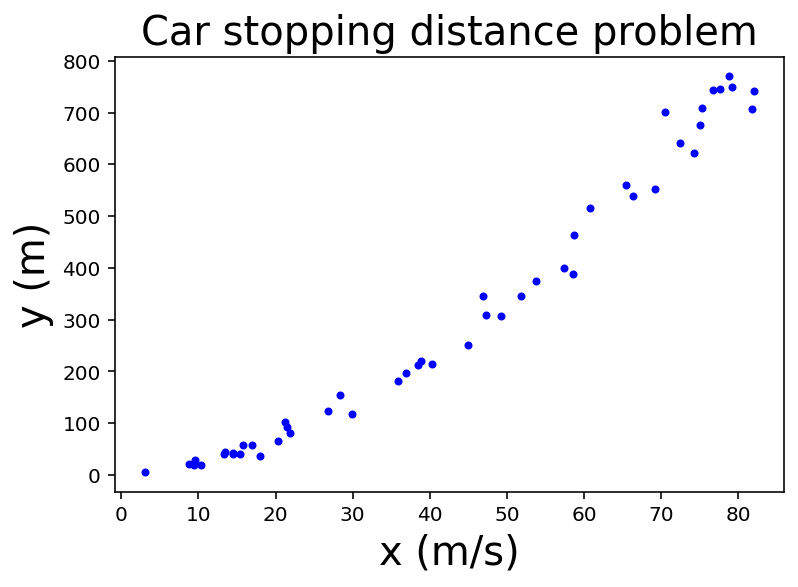

In [4]:
fig_car_data, ax_car_data = plt.subplots() # create a plot
ax_car_data.plot(Data_x, Data_y, 'b.')
ax_car_data.set_xlabel("x (m/s)", fontsize=20) # create x-axis label with font size 20
ax_car_data.set_ylabel("y (m)", fontsize=20) # create y-axis label with font size 20
ax_car_data.set_title("Car stopping distance problem", fontsize=20); # create title with font size 20

## Supervised learning: regression models

As we have been discussing, when we do regression via supervised learning we want to:

* create a machine learning model
* train it on known data (known inputs $x$ and outputs $y$)
* predict for new (unseen) data points, i.e. predict $y^*$ for a new value of $x^*$.

Today we will talk about the simplest models: **linear regression**.

## Linear regression models

Linear regression models encompass a class of machine learning methods that is larger than you might think...

As we will see, despite being called "linear" these models can do more than fitting a simple "line" to our data.

For now, let's consider 1d datasets, i.e. where we have one input $x$ and one output $y$.

### Simplest 1d linear regression model: fitting a line to your data

1. Observation distribution:

Usually, assumed as a Gaussian distribution,

$$
p(y|x, \mathbf{z}) = \mathcal{N}(y| \mu_{y|z} = \mathbf{w}^T \boldsymbol{\phi}(x), \sigma_{y|z}^2 = \sigma^2)
$$

where $\mathbf{z} = (\mathbf{w}, \sigma)$ are all the hidden rv's of the model, i.e. the model parameters.
* the vector $\mathbf{w} = [w_0, w_1]^T$ includes the **bias** term $w_0$ and the **weight** $w_1$.
* the vector $\boldsymbol{\phi}(x) = [1, x]^T$ includes the **basis functions**.

2. A chosen Prior distribution on each hidden rv of $\mathbf{z}$:

Usually, the prior on $w_0$ and $\sigma$ is the Uniform distribution.

However, the prior on the weight $w_1$ is often chosen as something else (but it can also be Uniform).

Does this model remind you of something we did?

* Car stopping distance problem when we knew one of the rv's and fixed $x$!

Note that,

$$
\begin{align}
p(y|x, \mathbf{z}) &= \mathcal{N}(y| \mathbf{w}^T \boldsymbol{\phi}(x), \sigma^2) \\
&= \mathcal{N}(y| w_0 + w_1 x, \sigma^2) \\
\end{align}
$$

where we previously called $w_0 \equiv b$, $w_1 \equiv z$ and $\sigma^2 \equiv \sigma_{y|z}^2$.

Therefore, the only difference is that we now start to consider more than one rv, so we group them into vector $\mathbf{z} = (\mathbf{w}, \sigma)$.

About notation:

* We can also write $\mathbf{z}^T = [\mathbf{w}^T, \sigma]$.

### 1d linear regression models with different basis functions: fitting a polynomial to your data

However, we know that usually a straight line does not provide a good fit to most data sets.

A very important realization:

* The basis functions vector $\boldsymbol{\phi}(x)$ does not need to be a *linear transformation*.

* It could be a polynomial or any other **nonlinear** transformation of the feature (input) $x$.

As long as the parameters of the basis functions vector $\boldsymbol{\phi}(x)$ are **fixed**, the model remains **linear in the parameters**, even if is not linear in the input (feature). That's why we still call this a **linear model**.

Here's how our **linear** regression model looks like for a polynomial basis functions vector $\boldsymbol{\phi}(x)$.

1. Observation distribution:

$$
p(y|x, \mathbf{z}) = \mathcal{N}(y| \mu_{y|z} = \mathbf{w}^T \boldsymbol{\phi}(x), \sigma_{y|z}^2 = \sigma^2)
$$

where $\mathbf{z} = (\mathbf{w}, \sigma)$ are all the hidden rv's of the model, i.e. the model parameters.
* the vector $\mathbf{w} = [w_0, w_1, w_2 ..., w_d]^T$ includes the **bias** term $w_0$ and the remaining **weights** $w_i$ with $i=1,..., d$.
* the vector $\boldsymbol{\phi}(x) = [1, x, x^2, ..., x^d]^T$ includes the **basis functions**, which now correspond to a polynomial of degree $d$.

2. A chosen Prior distribution for each hidden rv of $\mathbf{z}$, as mentioned previously.

## Linear regression models from a Bayesian perspective

The choice of likelihood and prior determines what is the linear regression model that you are choosing!

| Likelihood | Prior (on the weights)    | Posterior      | Name of the model | Book section  |
|---        |---         |---             |---              |---            |
| Gaussian  | Uniform    | Point estimate | Least Squares regression  | 11.2.2  |
| Gaussian  | Gaussian    | Point estimate | Ridge regression   | 11.3  |
| Gaussian  | Laplace    | Point estimate | Lasso regression  | 11.4  |
| Student-$t$  | Uniform    | Point estimate | Robust regression   | 11.6.1  |
| Laplace  | Uniform    | Point estimate | Robust regression   | 11.6.2  |
| Gaussian  | Gaussian    | Gaussian | Bayesian linear regression   | 11.7 |

We will derive some of these models soon but not today. Today, we focus on the practical aspects!

## Training (fitting) a linear model with Scikit-learn

Let's see how to use [scikit-learn](https://scikit-learn.org) to train linear regression models.

* [scikit-learn](https://scikit-learn.org) is a well-documented and user-friendly library that is great for introducing machine learning.

* You should really read the documentation.
    - It includes many useful examples.
    - It provides a short introduction to common machine learning algorithms.

## Example 1: training a linear model for the car stopping distance problem

<img src="../figures/reaction-braking-stopping.svg" title="Car stopping distance" width="50%" align="right">

Let's start by importing from scikit-learn the simplest linear regression model:

* Least Squares Regression (i.e. model with Gaussian likelihood, Uniform prior and Point estimate posterior).

And let's consider the simplest basis function:

* A line (polynomial of degree 1).

In [5]:
from sklearn.linear_model import LinearRegression # For Least Squares Regression
from sklearn.preprocessing import PolynomialFeatures # For Polynomial basis functions
from sklearn.pipeline import make_pipeline # to link different objects

Now let's define the model (Least Squares Regression + polynomial of degree 1)

In [6]:
# We start by defining the model (polynomial basis + Least Squares Regression)
degree = 1 # degree of polynomial we want to fit
poly_model = make_pipeline(PolynomialFeatures(degree),LinearRegression())

Then we train the model for our data (input Data_x and output Data_y that were loaded with pandas)

In [7]:
# Uncomment line below (this is just for students to understand: don't panic when encountering an error!)
#poly_model.fit(Data_x,Data_y) # but it gives an ERROR!

This gives an error! Fortunately, scikit-learn tells us what happened...

Scikit-learn expects the inputs to be formatted as a 2D array (matrix), instead of a 1D array (vector).

This happens because usually we fit machine learning models for multidimensional inputs.

In [8]:
# Reshape the input vector into a 2D array:
Data_X = np.reshape(Data_x, (-1, 1)) # we use capital letters for matrices and lower case for vectors

In [9]:
print(Data_X)

[[ 9.51693942]
 [72.39875748]
 [17.95032583]
 [ 9.44085299]
 [78.79100778]
 [16.96112056]
 [65.4103675 ]
 [58.67109927]
 [21.55060313]
 [36.86691294]
 [15.72874781]
 [58.51149357]
 [57.41918959]
 [38.45915667]
 [ 8.84174221]
 [60.73305107]
 [49.25666345]
 [35.89512052]
 [79.19565172]
 [69.15666925]
 [77.63489641]
 [ 9.25401128]
 [15.45146824]
 [14.43824684]
 [13.41099874]
 [53.74705712]
 [10.28371886]
 [82.00547705]
 [81.80556249]
 [51.8377421 ]
 [20.28378484]
 [28.35964692]
 [74.99371524]
 [21.82756352]
 [70.51911096]
 [74.20853195]
 [14.51895792]
 [13.35764354]
 [75.34625316]
 [44.92395642]
 [26.80115926]
 [29.90626522]
 [40.22635624]
 [66.28266205]
 [47.34277718]
 [ 3.08767411]
 [21.25461134]
 [46.93948443]
 [38.87569199]
 [76.70545196]]


After reshaping the input as a 2D array, we see that we can fit the model!

In [10]:
poly_model.fit(Data_X,Data_y) # now we were able to train (fit) our linear model to the data!

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('linearregression', LinearRegression())])

That's it! Here's your first ML model: fitting a straight line 😆

Now that we have a model, we can predict the output $y^*$ for any new input point $x^*$.

In particular, we can predict the output for each of the input points $x$ that we used for training the model (i.e. at Data_X).

In [11]:
y_pred = poly_model.predict(Data_X) # In scikit-learn, predicting from a model is a one-liner

Done! These are the predictions for all your training points.

But we can also predict the output $y^*$ for other points.

This enables us to visualize the model by predicting the output for a uniformly spaced set of points.

In [12]:
# Now create linearly spaced points for plotting our linear model
x_plot = np.linspace(0, 90, 200) # 200 points uniformly spaced
y_plot = poly_model.predict(np.reshape(x_plot, (-1, 1))) # prediction of those points (note the reshape again)

Finally, we can just plot the data, the predictions for each input training point, and the linear model.

In [13]:
# The usual plotting style for this model and the data.
fig_poly, ax_poly = plt.subplots() # create a plot
ax_poly.plot(Data_x, Data_y, 'b.', markersize=12,label="Data") # Markers locating data points)
ax_poly.plot(Data_x, y_pred, 'm*', markersize=12,label="Predictions") # Markers locating prediction points)
legend_str = "Linear regression with Polynomial of degree " + str(degree)
ax_poly.plot(x_plot, y_plot, 'm-', linewidth=2,label=legend_str) # polynomial interpolation plotted
ax_poly.set_xlabel("x (m/s)", fontsize=20) # create x-axis label with font size 20
ax_poly.set_ylabel("y (m)", fontsize=20) # create y-axis label with font size 20
ax_poly.set_title("Car stopping distance problem", fontsize=20) # create title with font size 20
ax_poly.legend(loc='upper left', fontsize=15) # replot legend
fig_poly.set_size_inches(7.5, 6) # scale figure to be taller
plt.close(fig_poly) # do not plot the figure now. We will show it in a later cell

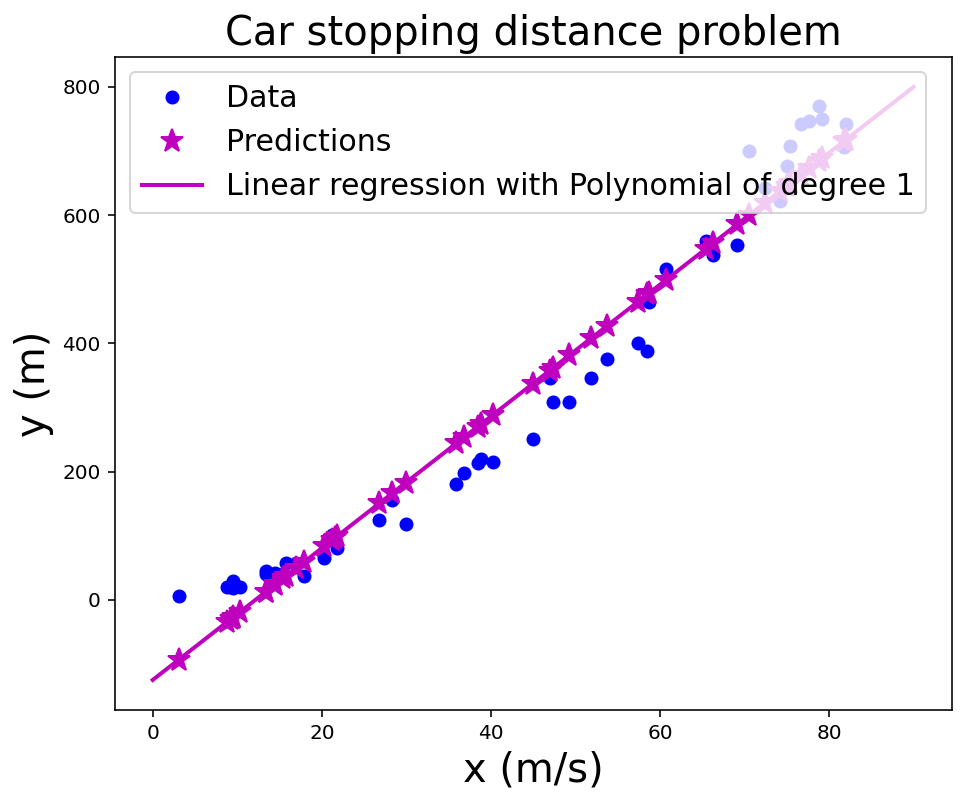

In [14]:
fig_poly # just call the figure that we created in the previous cell.

Now we can see all the things that we have done in a single plot!

## In-class Exercise

1. Put it all together and create a linear model using a polynomial of degree 2 for the same data.


2. Compare your plot with the one obtained for the straight line (polynomial of degree 1).


3. Play a bit with your code by changing the degree of the polynomial. What happens?

In [15]:
# Write your code for In-class Exercise:

# until here.

Go back to the previous cell and try to keep increasing the polynomial degree.

* You see the prediction getting worse!

This is called **overfitting**.

- Overfitting is a natural consequence of having a model that is more complex than it should be!

- As we know, the mean of the data that originates from the car stopping distance problem is generated with a quadratic model: $y = z_1 x + z_2 x^2$
    * Therefore, we don't need additional complexity to describe the *mean* of the data!

Also, the fit is better **within the domain** that we used for training ($x\in [3, 83]$) than away from it.

In other words, we **interpolate** better than we **extrapolate**.

* Nevertheless, overfitting is also an issue when we are interpolating...
    - See this by making the degree very high, e.g. 30, and plot for $x\in [5, 80]$.

It might be surprising, but this is an important issue in ML.

It is very common to use models that are complicated (have many parameters) and that perform poorly even when interpolating, but especially when extrapolating!

### See you next class

Have fun!

## Solution for In-class Exercise

```python
degree = 2
poly_model = make_pipeline(PolynomialFeatures(degree),LinearRegression()) # model
poly_model.fit(np.reshape(Data_x, (-1, 1)),Data_y) # training (fitting)
y_pred = poly_model.predict(Data_X) # predict y for Data_x
x_plot = np.linspace(0, 90, 200) # 200 points uniformly spaced
y_plot = poly_model.predict(np.reshape(x_plot, (-1, 1))) # prediction for those points
fig_poly, ax_poly = plt.subplots() # create a plot
ax_poly.plot(Data_x, Data_y, 'b.', markersize=12,label="Data") # Markers locating data points)
ax_poly.plot(Data_x, y_pred, 'm*', markersize=12,label="Predictions") # Markers locating prediction points)
legend_str = "Linear regression with Polynomial of degree " + str(degree)
ax_poly.plot(x_plot, y_plot, 'm-', linewidth=2,label=legend_str) # polynomial interpolation plotted
ax_poly.set_xlabel("x (m/s)", fontsize=20) # create x-axis label with font size 20
ax_poly.set_ylabel("y (m)", fontsize=20) # create y-axis label with font size 20
ax_poly.set_title("Car stopping distance problem", fontsize=20) # create title with font size 20
ax_poly.legend(loc='upper left') # replot legend
```